## Twitter Analysis with python and pandas
This is a rework of an existing sentiment analysis project. It has been modified for the sake of simplicity.

Author of original project: KROUDIR Amir

Github:
- Profile: https://github.com/kroudir
- Project: https://github.com/kroudir/Twitter-Sentiment-Analysis-with-python/blob/master/Project_notebook.ipynb


### 1) Data Access

1. Let’s load the libraries which will be used in this project.

In [97]:
%pip install nltk
%pip install pandas

%pip install seaborn
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [98]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

Let’s read the dataset into a pandas data frame.

In [99]:
data  = pd.read_csv('TweetsElonMusk.csv') 


In [100]:
data.head(10)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'Vincent 🚀🟠', 'id': '1689516060'}]",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubbery Capital', 'id': '1889587914'}, {'screen_name': 'CathieDWood', 'name': 'Cathie Wood', 'id': '2361631088'}, {'screen_name': 'ARKInvest', 'name': 'AR...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸', 'id': '1061349266545885185'}]",NaN,NaN,NaN,NaN
5,1381033434806542336,1380830567768416263,2021-04-11 02:56:43 EEST,2021-04-11,02:56:43,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'seinfeldguru', 'name': 'Rosalie', 'id': '140074404'}, {'screen_name': 'WholeMarsBlog', 'name': 'Whole Mars Catalog', 'id': '1263491240336769026'}]",NaN,NaN,NaN,NaN
6,1381032961814892545,1380830567768416263,2021-04-11 02:54:51 EEST,2021-04-11,02:54:51,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'WholeMarsBlog', 'name': 'Whole Mars Catalog', 'id': '1263491240336769026'}]",NaN,NaN,NaN,NaN
7,1381032333126500355,1380988989818208264,2021-04-11 02:52:21 EEST,2021-04-11,02:52:21,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DeltavPhotos', 'name': 'ΔV Photos 🚀', 'id': '1255532858514513928'}, {'screen_name': 'PortCanaveral', 'name': 'Port Canaveral', 'id': '89027071'}]",NaN,NaN,NaN,NaN
8,1381006333864861696,1381006333864861696,2021-04-11 01:09:02 EEST,2021-04-11,01:09:02,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9,1380979481309945856,1380949316215451649,2021-04-10 23:22:20 EEST,2021-04-10,23:22:20,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'engineers_feed', 'name': 'World of Engineering', 'id': '3429950987'}]",NaN,NaN,NaN,NaN


### 2) Data Inspection


Firstly - let’s check dimensions of the dataset.

In [124]:
data.shape # gives back the shape of the data frame (number of columns and rows)


(12562, 37)

The dataset has 12,562 tweets and 36 attributes.

Let’s have a glance at the different attributes.

In [125]:
data.columns # gives us all column names

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'tidy_tweet'],
      dtype='object')

Let’s check out the text of some tweets, which should be in the "tweet" column.

In [126]:

data["tweet"].head(10)



0                                                                                                                    @vincent13031925 For now. Costs are decreasing rapidly.
1                                                                                                                                                   Love this beautiful shot
2                                                                                                                        @agnostoxxx @CathieDWood @ARKInvest Trust the shrub
3                                                                                                                                         The art In Cyberpunk is incredible
4                                                                                                                                                            @itsALLrisky 🤣🤣
5                                                                                                                                     @

In [104]:
top10 = data.sort_values(by="retweets_count",ascending=False).head(10)
top10_df = pd.DataFrame(top10["tweet"],top10["retweets_count"])
top10_df

,tweet
retweets_count,
361461,NaN
301391,NaN
200338,NaN
168669,NaN
160931,NaN
151108,NaN
150771,NaN
150264,NaN
149511,NaN


Now we will check the distribution of length of the tweets, in terms of words.

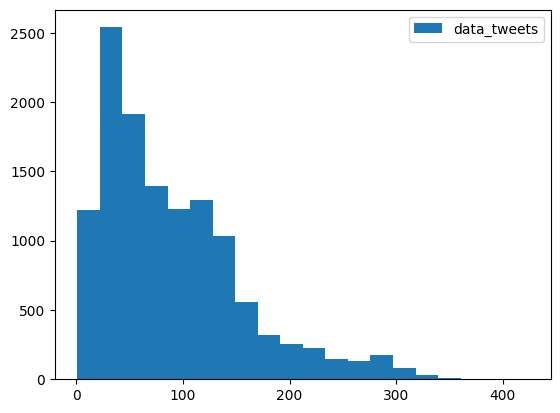

In [105]:
length_data = data['tweet'].str.len() 
plt.hist(length_data, bins=20, label="data_tweets") 
plt.legend()
plt.show()

### 3) Data Cleaning


In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [106]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

We will be following the steps below to clean the raw tweets in our data.

1. We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

2. We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.

3. Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.

4. Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.

#### 1. Removing Twitter Handles (@user)

Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [107]:
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*") 
data.head(10)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tidy_tweet
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'Vincent 🚀🟠', 'id': '1689516060'}]",NaN,NaN,NaN,NaN,For now. Costs are decreasing rapidly.
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Love this beautiful shot
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubbery Capital', 'id': '1889587914'}, {'screen_name': 'CathieDWood', 'name': 'Cathie Wood', 'id': '2361631088'}, {'screen_name': 'ARKInvest', 'name': 'AR...",NaN,NaN,NaN,NaN,Trust the shrub
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,The art In Cyberpunk is incredible
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸', 'id': '1061349266545885185'}]",NaN,NaN,NaN,NaN,🤣🤣
5,1381033434806542336,1380830567768416263,2021-04-11 02:56:43 EEST,2021-04-11,02:56:43,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'seinfeldguru', 'name': 'Rosalie', 'id': '140074404'}, {'screen_name': 'WholeMarsBlog', 'name': 'Whole Mars Catalog', 'id': '1263491240336769026'}]",NaN,NaN,NaN,NaN,Nope haha
6,1381032961814892545,1380830567768416263,2021-04-11 02:54:51 EEST,2021-04-11,02:54:51,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'WholeMarsBlog', 'name': 'Whole Mars Catalog', 'id': '1263491240336769026'}]",NaN,NaN,NaN,NaN,"If you don’t say anything &amp; engage Autopilot, it will soon guess based on time of day, taking you home or to work or to what’s on your calendar"
7,1381032333126500355,1380988989818208264,2021-04-11 02:52:21 EEST,2021-04-11,02:52:21,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'DeltavPhotos', 'name': 'ΔV Photos 🚀', 'id': '1255532858514513928'}, {'screen_name': 'PortCanaveral', 'name': 'Port Canaveral', 'id': '89027071'}]",NaN,NaN,NaN,NaN,That rocket is a hardcore veteran of many missions
8,1381006333864861696,1381006333864861696,2021-04-11 01:09:02 EEST,2021-04-11,01:09:02,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Blimps rock https://t.co/e8cu5FkNOI
9,1380979481309945856,1380949316215451649,2021-04-10 23:22:20 EEST,2021-04-10,23:22:20,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'engineers_feed', 'name': 'World of Engineering', 'id': '3429950987'}]",NaN,NaN,NaN,NaN,"Due to lower gravity, you can travel from surface of Mars to surface of Earth fairly easily with a single stage rocket. Earth to Mars is vastly harder."


#### 2. Removing Punctuations, Numbers, and Special Characters

Here we will replace everything except characters and hashtags with spaces. The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [127]:
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
data['tidy_tweet'].head(10)



0                                                                                            now. cost decreas rapidly.
1                                                                                                  love thi beauti shot
2                                                                                                           trust shrub
3                                                                                                      cyberpunk incred
4                                                                                                                      
5                                                                                                             nope haha
6                  don’t anyth &amp; engag autopilot, will soon guess base time day, take home work what’ your calendar
7                                                                              that rocket hardcor veteran mani mission
8                                       

In [109]:
data["tweet"]

0                                                                                                                                                        @vincent13031925 For now. Costs are decreasing rapidly.
1                                                                                                                                                                                       Love this beautiful shot
2                                                                                                                                                            @agnostoxxx @CathieDWood @ARKInvest Trust the shrub
3                                                                                                                                                                             The art In Cyberpunk is incredible
4                                                                                                                                                                   

#### 3. Removing Short Words

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [110]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [111]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tidy_tweet
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'Vincent 🚀🟠', 'id': '1689516060'}]",NaN,NaN,NaN,NaN,now. Costs decreasing rapidly.
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Love this beautiful shot
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubbery Capital', 'id': '1889587914'}, {'screen_name': 'CathieDWood', 'name': 'Cathie Wood', 'id': '2361631088'}, {'screen_name': 'ARKInvest', 'name': 'AR...",NaN,NaN,NaN,NaN,Trust shrub
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Cyberpunk incredible
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸', 'id': '1061349266545885185'}]",NaN,NaN,NaN,NaN,


You can see the difference between the raw tweets and the cleaned tweets (tidy_tweet) quite clearly. Only the important words in the tweets have been retained and the noise (numbers, punctuations, and special characters) has been removed.

#### 4. Text Normalization

Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [112]:
tokenized_tweet = data['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [now., Costs, decreasing, rapidly.]
1          [Love, this, beautiful, shot]
2                         [Trust, shrub]
3                [Cyberpunk, incredible]
4                                     []
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets.

In [113]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
# stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [114]:
tokenized_tweet.head()

0    [now., cost, decreas, rapidly.]
1          [love, thi, beauti, shot]
2                     [trust, shrub]
3                [cyberpunk, incred]
4                                 []
Name: tidy_tweet, dtype: object

Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

In [115]:
data['tidy_tweet'] = tokenized_tweet.apply(lambda x: ' '.join(x))


In [116]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tidy_tweet
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'Vincent 🚀🟠', 'id': '1689516060'}]",NaN,NaN,NaN,NaN,now. cost decreas rapidly.
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,love thi beauti shot
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubbery Capital', 'id': '1889587914'}, {'screen_name': 'CathieDWood', 'name': 'Cathie Wood', 'id': '2361631088'}, {'screen_name': 'ARKInvest', 'name': 'AR...",NaN,NaN,NaN,NaN,trust shrub
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,cyberpunk incred
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸', 'id': '1061349266545885185'}]",NaN,NaN,NaN,NaN,


### 4) Story Generation and Visualization of Tweets

In this section, we will explore the cleaned tweets. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights.

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

- What are the most common words in the entire dataset?
- What are the most common words in the dataset for negative and positive tweets, respectively?
- How many hashtags are there in a tweet?
- Which trends are associated with my dataset?
- Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

#### Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the data dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

In [117]:
%pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [118]:
from wordcloud import WordCloud 

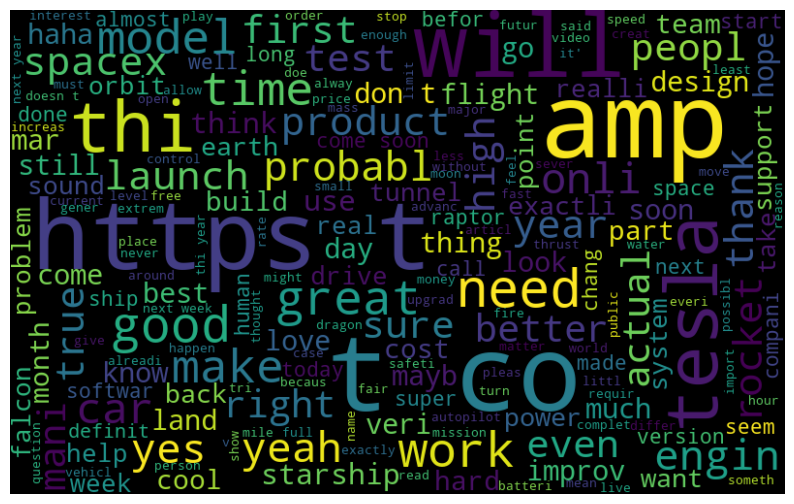

In [119]:
all_words = ' '.join([text for text in data['tidy_tweet']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our data data.

#### Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

For instance, given below is a tweet from our dataset:
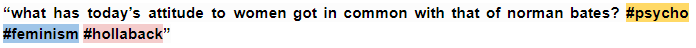

The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [120]:
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    
    return hashtags

In [121]:
# extracting hashtags
HT_regular = hashtag_extract(data['tidy_tweet']) 

# unnesting list 
HT_regular = sum(HT_regular,[]) 


Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.
##### Non-Racist/Sexist Tweets

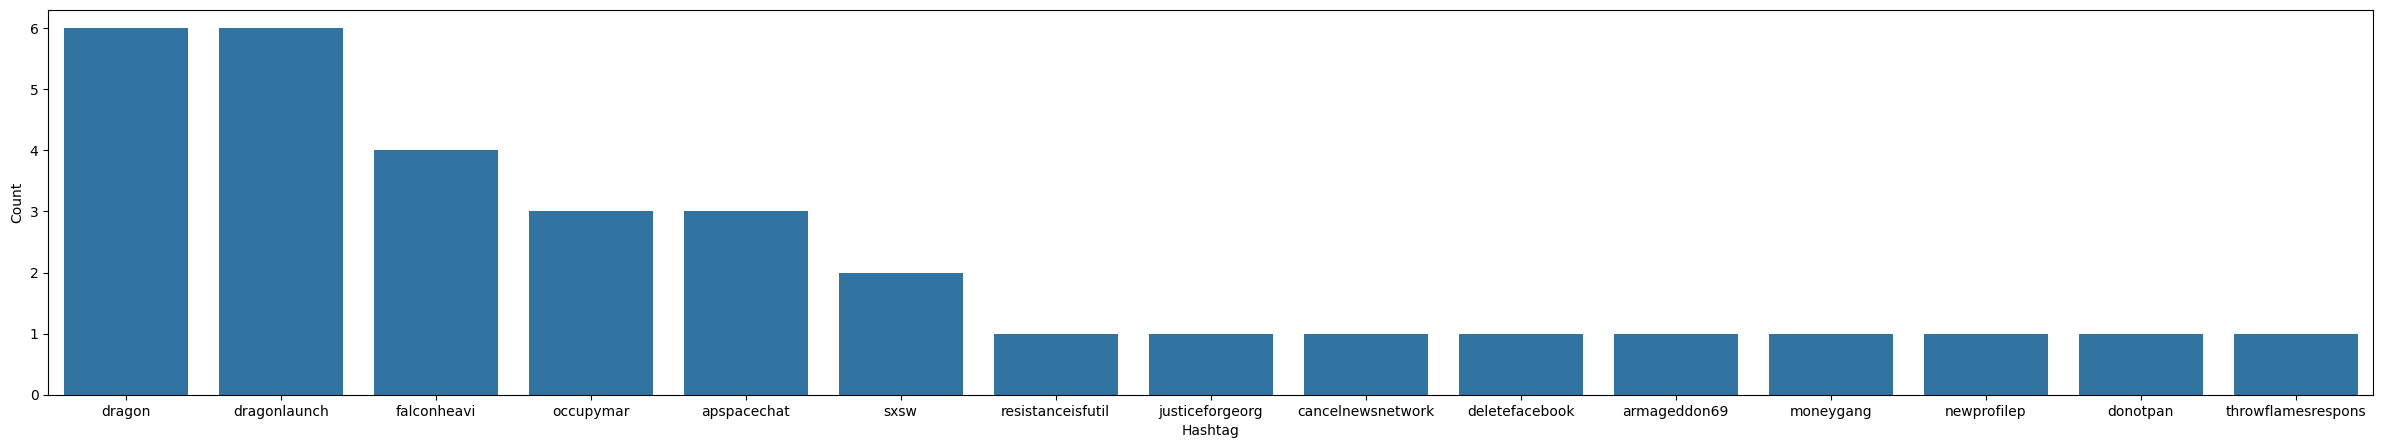

In [122]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(30,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

['resistanceisfutil', 'justiceforgeorg', 'cancelnewsnetwork', 'deletefacebook', 'armageddon69', 'moneygang', 'newprofilep', 'occupymar', 'donotpan', 'throwflamesrespons', 'pravduh', 'falconheavi', 'falconheavi', 'falconheavi', 'falconheavi', 'spacex', '17', 'yutu', 'katiewoodencloak', 'teslatx', 'hhgttg', 'sxsw', 'sxsw', 'dragon', 'sb47', 'zeitgeist2012', 'awesomexmasgift', 'climat', 'occupymar', 'dragon', 'dragon', 'dragon', 'dragon', 'grasshopperproject', 'dragon', 'dragonlaunch', 'dragonlaunch', 'dragonlaunch', 'dragonlaunch', 'dragonlaunch', 'dragonlaunch', 'apspacechat', 'occupymar', 'apspacechat', 'apspacechat', 'antarctica', 'plutostamp', 'whatcouldpossiblygowrong', 'mar']


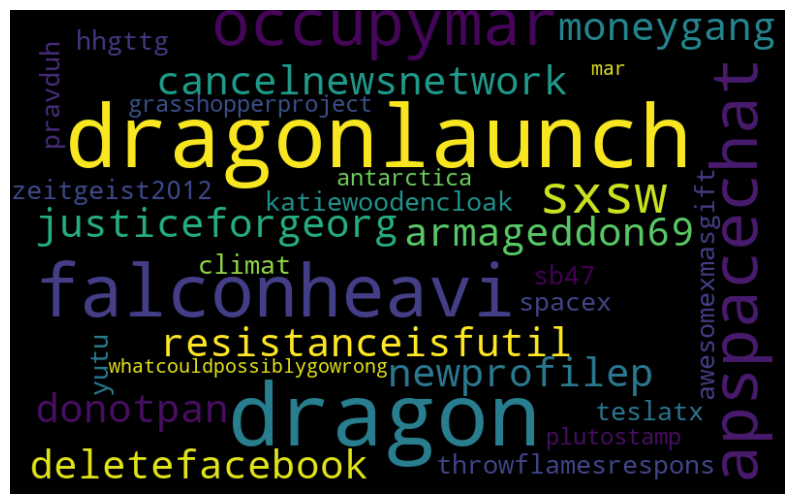

In [123]:
print(HT_regular)
d = ' '.join(HT_regular)

# all_words = ' '.join([text for text in HT_regular]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=90).generate(d) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()